In [1]:
import geopandas as gpd

In [2]:
zip = "/media/muskrat/T7 Shield/eco_data/v3/native/GAP/extract/mABSQx_CONUS_Range_2001v1.zip"

df = gpd.read_file(zip)

In [3]:
df

,SeasonCode,SeasonName,geometry
0,1,Year-round,"MULTIPOLYGON (((-1363987.125 1023027.500, -136..."
1,1,Year-round,"MULTIPOLYGON (((-1021194.687 1578637.250, -102..."


<AxesSubplot:>

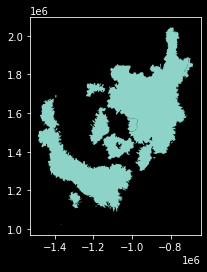

In [4]:
df.plot()

In [4]:
df.crs

<Projected CRS: PROJCS["NAD_1983_Albers",GEOGCS["NAD83",DATUM["Nor ...>
Name: NAD_1983_Albers
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
# converts crs to epsg:4326
df = df.to_crs("EPSG:4326")
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

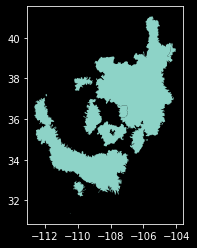

In [7]:
df.plot()

In [6]:
ecomap_loc = "/media/muskrat/T7 Shield/eco_data/ecomap_final/eco_map.geojson"

eco_map = gpd.read_file(ecomap_loc)

In [7]:
eco_map

,unique_id,name,TYPE,geometry
0,601,Northern Mesoamerican Pacific mangroves,TEOW,"POLYGON ((-112.34994 29.32458, -112.34989 29.3..."
1,601,Northern Mesoamerican Pacific mangroves,TEOW,"POLYGON ((-112.19907 29.17528, -112.19582 29.1..."
2,533,Sinaloan dry forests,TEOW,"MULTIPOLYGON (((-109.11700 27.74142, -109.1169..."
3,601,Northern Mesoamerican Pacific mangroves,TEOW,"MULTIPOLYGON (((-110.54179 27.38383, -110.5384..."
4,601,Northern Mesoamerican Pacific mangroves,TEOW,"POLYGON ((-110.53340 27.28772, -110.53314 27.2..."
...,...,...,...,...
13913,1053,Kermadec Island,MEOW,"MULTIPOLYGON (((-178.80023 -31.34033, -178.804..."
13914,1054,Northeastern New Zealand,MEOW,"MULTIPOLYGON (((174.83127 -36.93680, 174.83125..."
13915,1055,Chatham Island,MEOW,"POLYGON ((-177.40487 -43.89933, -177.40105 -43..."
13916,1056,Central New Zealand,MEOW,"MULTIPOLYGON (((176.16790 -44.38797, 176.18338..."


In [8]:
eco_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

(30.0, 45.0)

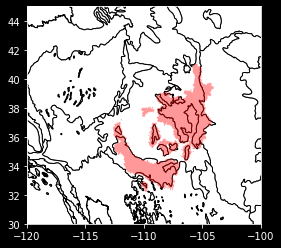

In [19]:
# plot ecomap and df on same map
base = eco_map.plot(color="white", edgecolor="black")
xmin, ymin, xmax, ymax = (-120, 30, -100, 45)

ax = df.plot(ax=base, color="red", alpha=0.4)

# set the x and y limits of the plot to the specified bounding box coordinates
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# plot the GeoDataFrame with the specified bounding box
# df.plot(ax=base, color='red', extent=[xmin, xmax, ymin, ymax])

# df.plot(ax=base, color='red')

In [12]:
# convert df to geodataframe
df = gpd.GeoDataFrame(df, geometry="geometry")

In [14]:
df

,SeasonCode,SeasonName,geometry
0,1,Year-round,"MULTIPOLYGON (((-110.44261 31.34802, -110.4428..."
1,1,Year-round,"MULTIPOLYGON (((-107.56460 36.69359, -107.5627..."


In [15]:
# split first row of df into a new dataframe
df2 = df.iloc[0:1]
df2

,SeasonCode,SeasonName,geometry
0,1,Year-round,"MULTIPOLYGON (((-110.44261 31.34802, -110.4428..."


In [19]:
# check if df geometry intersects with ecomap geometry

intersects = gpd.sjoin(df, eco_map)

In [20]:
intersects

,SeasonCode,SeasonName,geometry,index_right,unique_id,name,TYPE
0,1,Year-round,"MULTIPOLYGON (((-110.44261 31.34802, -110.4428...",8554,415,Chihuahuan desert,TEOW
0,1,Year-round,"MULTIPOLYGON (((-110.44261 31.34802, -110.4428...",8230,310,Sierra Madre Occidental pine-oak forests,TEOW
0,1,Year-round,"MULTIPOLYGON (((-110.44261 31.34802, -110.4428...",8712,310,Sierra Madre Occidental pine-oak forests,TEOW
0,1,Year-round,"MULTIPOLYGON (((-110.44261 31.34802, -110.4428...",8708,310,Sierra Madre Occidental pine-oak forests,TEOW
0,1,Year-round,"MULTIPOLYGON (((-110.44261 31.34802, -110.4428...",6418,310,Sierra Madre Occidental pine-oak forests,TEOW
0,1,Year-round,"MULTIPOLYGON (((-110.44261 31.34802, -110.4428...",6426,310,Sierra Madre Occidental pine-oak forests,TEOW
0,1,Year-round,"MULTIPOLYGON (((-110.44261 31.34802, -110.4428...",6423,310,Sierra Madre Occidental pine-oak forests,TEOW
0,1,Year-round,"MULTIPOLYGON (((-110.44261 31.34802, -110.4428...",8688,310,Sierra Madre Occidental pine-oak forests,TEOW
0,1,Year-round,"MULTIPOLYGON (((-110.44261 31.34802, -110.4428...",8484,331,Arizona Mountains forests,TEOW
0,1,Year-round,"MULTIPOLYGON (((-110.44261 31.34802, -110.4428...",8499,331,Arizona Mountains forests,TEOW
